In [49]:

import numpy as np
from keras import models
from keras import layers
from keras.datasets import imdb, reuters, boston_housing
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd 

# Ch. 1 

* gradient boosting for shallow learning problems 
* deep learning for perceptual problems 

on page 22 on 1/20/24

In [1]:
import numpy as np 

In [28]:
x = np.random.uniform(-5,5, (4,4))
y = np.random.uniform(-5,5, (4,4))

In [22]:
def naive_relu(x):
    assert len(x.shape) == 2
    
    x = x.copy()
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
            
    return x

In [30]:
naive_relu(x)

array([[2.84252693, 0.        , 1.96052552, 0.91985948],
       [0.        , 3.37685683, 0.        , 2.11250857],
       [3.13430744, 0.        , 0.        , 0.        ],
       [0.        , 4.78287969, 0.        , 0.        ]])

In [31]:
def naive_add(x, y):
    
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
            
    return x

In [32]:
naive_add(x,y)

array([[ 2.63696977, -2.30371666,  4.12741541, -3.06515319],
       [-0.13951455,  1.32102723, -5.60457475,  4.73492214],
       [ 1.79633823, -6.29120227, -2.33763904, -8.44410818],
       [-2.1028077 ,  8.60946413, -6.65281469, -7.59659039]])

In [33]:
z = x + y # element wise addition in numpy 
z = np.maximum(x, 0) # numpy implemented relu

In [47]:
q = z.copy()
q.shape

(4, 4)

In [50]:
q.reshape((16,1)).shape

(16, 1)

In [57]:
A = np.array([[1,5], [7,1]])
A.transpose()

array([[1, 7],
       [5, 1]])

On p. 46, ch. 2.4 on 1/22/24

# Example 1 - imdb classification

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [3]:
# there are a bunch of words associated with one review 
train_labels[0]

1

In [4]:
# decode review 0 back to english 
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
len(decoded_review.split())

218

In [6]:
len(train_data[0]) # so each word corresponds to an index in training data.

218

In [5]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results 

In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Build the model

- outputting probabilities, so use `binary_crossentropy`

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

In [9]:
# validation set 
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.6953 - loss: 0.2098 - val_accuracy: 0.8385 - val_loss: 0.1428
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8765 - loss: 0.1222 - val_accuracy: 0.8710 - val_loss: 0.1117
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9049 - loss: 0.0948 - val_accuracy: 0.8676 - val_loss: 0.1055
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9163 - loss: 0.0798 - val_accuracy: 0.8733 - val_loss: 0.0984
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9308 - loss: 0.0680 - val_accuracy: 0.8859 - val_loss: 0.0890
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9381 - loss: 0.0613 - val_accuracy: 0.8849 - val_loss: 0.0875
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9413 - loss: 0.0568 - val_accuracy: 0.8873 - val_loss: 0.0860
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9485 - loss: 0.0508 - val_accuracy: 0.8876 - v

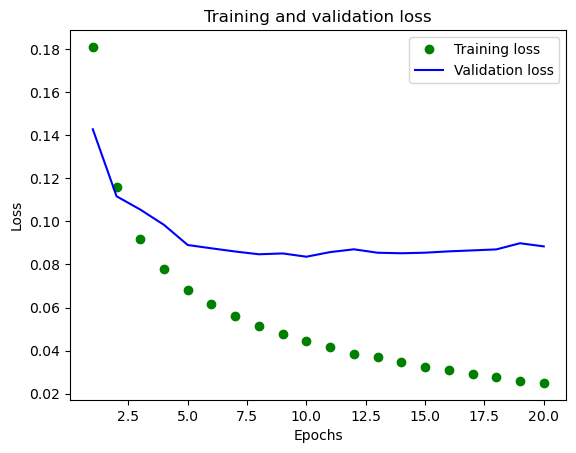

In [11]:

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

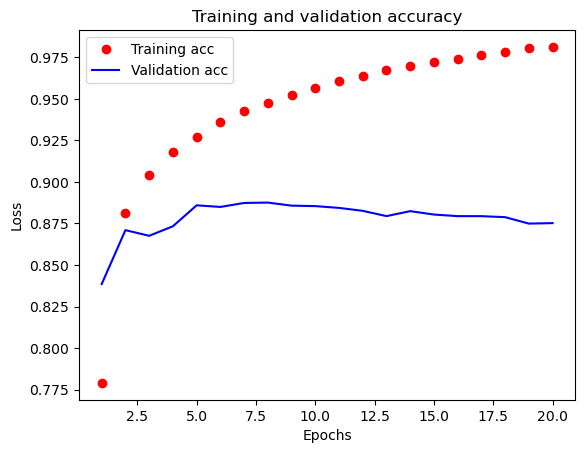

In [12]:
plt.clf()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'ro', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
# retrain from scracth with only 4 epochs

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7364 - loss: 0.5659
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9012 - loss: 0.2924
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9215 - loss: 0.2208
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9366 - loss: 0.1850
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8844 - loss: 0.2868


In [14]:
results

[0.28355661034584045, 0.8869085907936096]

In [15]:
# likelihood of test reviews being positive
model.predict(x_test)[[1,50,250]]

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.99943644],
       [0.00821803],
       [0.36736912]], dtype=float32)

stopping on 3.4.6 p. 77

# Example 2 (3.5, p. 78)

In [6]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_test.shape

(2246, 10000)

In [11]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [12]:
one_hot_train_labels.shape

(8982, 46)

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [14]:
model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy', # distance between two probability dist.
    metrics=['accuracy'])

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.3255 - loss: 3.2668 - val_accuracy: 0.6020 - val_loss: 1.9111
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6507 - loss: 1.7201 - val_accuracy: 0.6880 - val_loss: 1.4135
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7298 - loss: 1.2610 - val_accuracy: 0.7250 - val_loss: 1.2134
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7760 - loss: 1.0390 - val_accuracy: 0.7530 - val_loss: 1.0967
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8180 - loss: 0.8601 - val_accuracy: 0.7830 - val_loss: 1.0112
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8468 - loss: 0.7017 - val_accuracy: 0.7920 - val_loss: 0.9726
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8704 - loss: 0.6053 - val_accuracy: 0.8060 - val_loss: 0.9229
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8943 - loss: 0.4990 - val_accuracy: 0.8190 - v

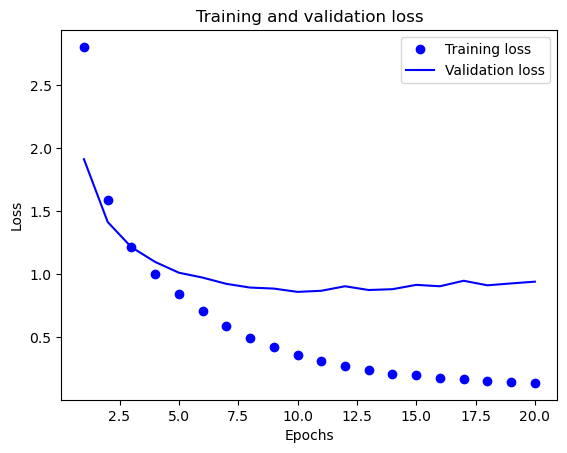

In [20]:
loss = history.history['loss']

val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [23]:
predictions[0] # probabilities that each entry falls into a certain class 

array([2.0242551e-06, 5.7900940e-07, 4.2857362e-08, 9.9168527e-01,
       6.3425372e-03, 1.8690108e-07, 8.2426205e-08, 7.4395466e-06,
       5.0971686e-04, 2.8696905e-07, 2.4642645e-06, 1.8637262e-05,
       1.9637089e-06, 2.7996850e-05, 4.0892751e-08, 3.8118580e-07,
       5.1444415e-05, 2.6809660e-06, 5.3776944e-07, 5.9205835e-04,
       1.0923653e-04, 5.4594751e-05, 1.3687238e-06, 1.0566086e-07,
       3.1153920e-08, 1.3727919e-06, 3.3347360e-09, 8.5947018e-09,
       1.3501941e-07, 1.1072809e-06, 5.9103186e-06, 1.0458660e-06,
       1.9640067e-06, 1.0997804e-06, 3.4929660e-06, 1.0925412e-06,
       5.5697776e-04, 2.0930150e-07, 1.2073733e-07, 1.0216508e-05,
       8.5491081e-08, 1.5442335e-07, 3.3400595e-06, 1.9340407e-08,
       6.0825718e-09, 7.4975659e-08], dtype=float32)

In [24]:
max(predictions[0])

0.9916853

In [25]:
np.argmax(predictions[0])

3

# Boston Housing Example

In [58]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [67]:
# center and scale 

mean = train_data.mean(axis = 0)
train_data -= mean 
std = train_data.std(axis=0)
train_data /= std

# never center and scale with data from the test data, creates look ahead bias 
test_data -= mean
test_data /= std

We don't need an activation function as the last layer because we are fine with values $\in [-\infty, \infty]$

In [68]:
# will build model multiple times 
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

Manually doing k-fold cross validation

In [69]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)

    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# Ch. 4

In [70]:
# start on p. 94